In [1]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

In [5]:


import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('../Analysis/')

# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

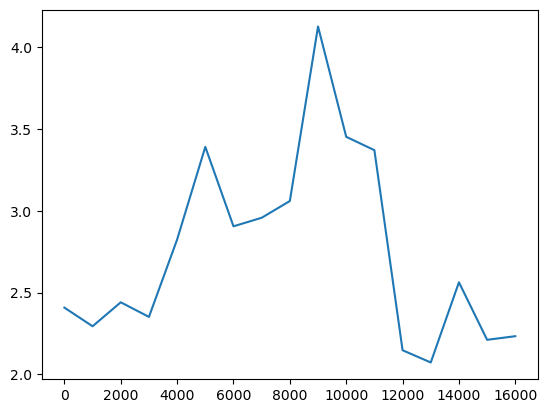

In [10]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

#plot distance vs time
plt.plot(traj.time, dist)


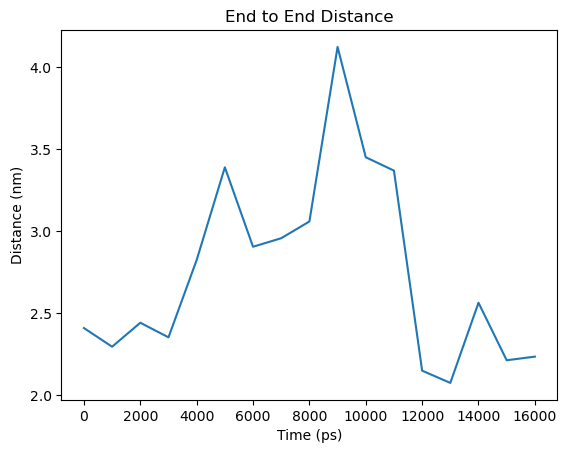

In [12]:
# make this plot look nice
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End to End Distance')
plt.plot(traj.time, dist)

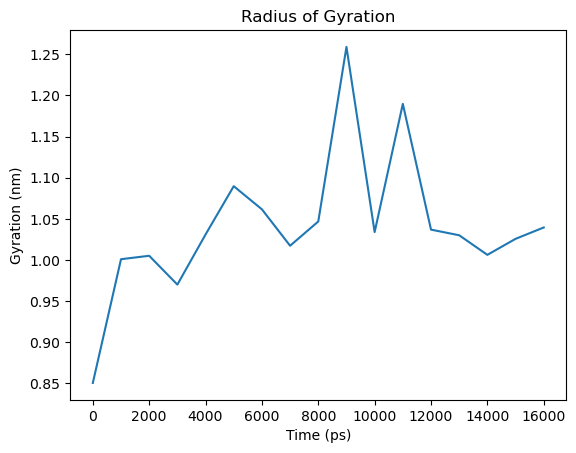

In [16]:
gyr = md.compute_rg(traj)
plt.xlabel('Time (ps)')
plt.ylabel('Gyration (nm)')
plt.title('Radius of Gyration')
plt.plot(traj.time, gyr)

Text(0.5, 0.98, 'Gyration Radius (black) and end-end Distance (green) Versus Time')

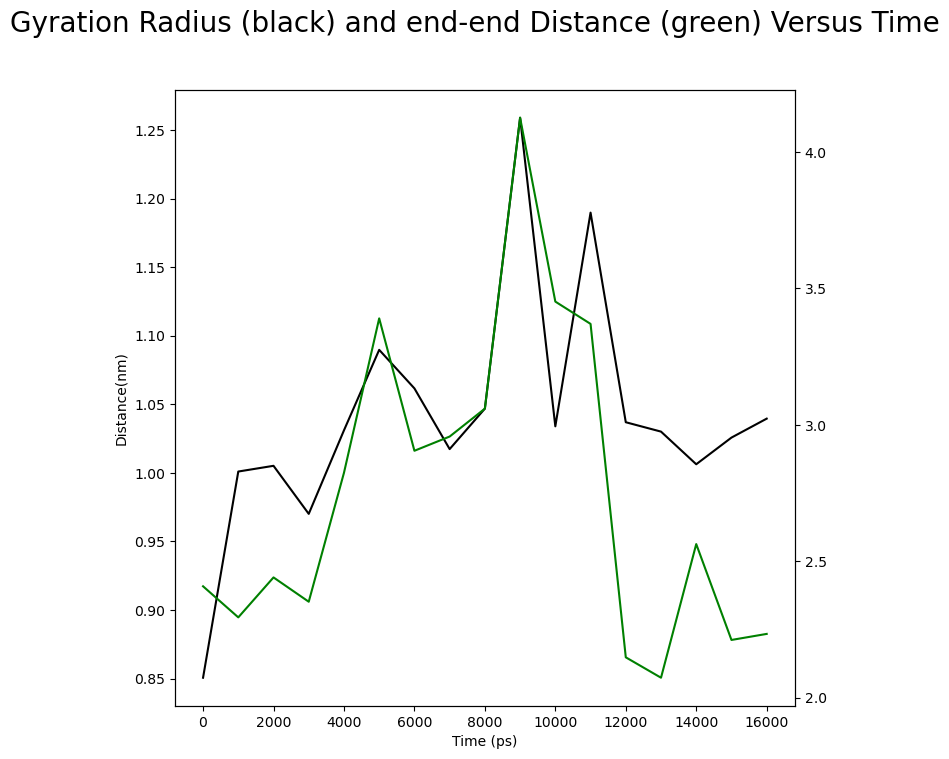

In [23]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(traj.time, gyr, color='k')
ax2.plot(traj.time, dist, color='g')

ax1.set_xlabel("Time (ps)")
ax1.set_ylabel("Distance(nm)")
fig.suptitle("Gyration Radius (black) and end-end Distance (green) Versus Time", fontsize=20)

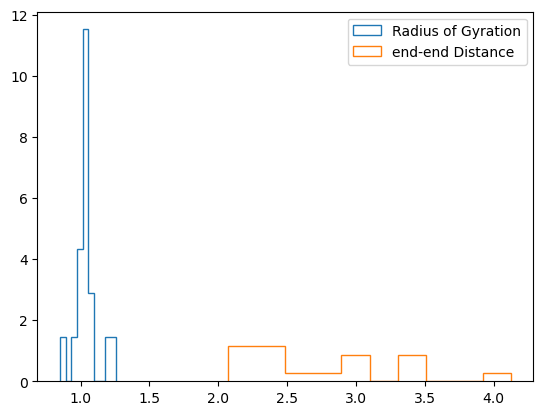

In [27]:
fig, ax = plt.subplots() # Instantiate figure and axes object
ax.hist(gyr, label="Radius of Gyration", histtype="step", density=True) # Plot histogram of nums1
ax.hist(dist, label="end-end Distance", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.show()
